In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
class Process:
    def __init__(self, init_0=0, dx=1, process_var=1):
        self.dx = dx
        self.std = np.sqrt(process_var)
        self.data = np.array([init_0])
        self.noised_data = np.array([self.data[0] + np.random.randn() * self.std])
        
    def get_mes(self):
        self.data = np.concatenate([self.data, np.array([self.data[-1] + self.dx])])
        self.noised_data = np.concatenate([self.noised_data, np.array([self.data[-1] + np.random.randn() * self.std])])
        return self.noised_data[-1]

In [112]:
class KF_ND:
    def __init__(self, F, Q, H, R):
        self.R = R
        self.Q = Q
        self.F = F
        self.H = H
        self.P = np.copy(Q)
        self.dim = self.Q.shape[0]
        self.x = np.array([[0.0], [0]])
        
    #predict step
    def predict(self):
        self.x = self.F @ self.x
        self.P = self.F @ self.P @ self.F.T + self.Q
        return
    
    #update step
    def update(self, z):
        y = z - self.H @ self.x
        K = self.P @ self.H.T @ np.linalg.inv(self.H @ self.P @ self.H.T + self.R)
        self.x += K @ y
        self.P = (np.eye(self.dim) - K @ self.H) @ self.P
        return

    #filter output
    def __call__(self, mes):
        self.predict()
        self.update(mes)
        return self.x, self.P

In [170]:
#model params
dt = 1
sigma_sq_vel = 0.01
F = np.array([[1, dt], [0, 1]])
Q = np.array([[dt*dt/2], [dt]])
Q = sigma_sq_vel*Q.dot(Q.T)
x0 = 0.5
dx=1
#measurement params
H = np.array([[1.0, 0]])
R = 900 * np.array([[1.0]])

In [171]:
size = 100

process = Process(init_0=x0, dx=dx, process_var=90)
kf = KF_ND(Q=Q, R=R, H=H, F=F)
filter = []
filter.append(x0)

t = np.linspace(0, size, size + 1)
for i in t[1:]:
    mes = process.get_mes()
    estimate, cov = kf(np.array([[mes]]))
    filter.append(estimate[0][0])

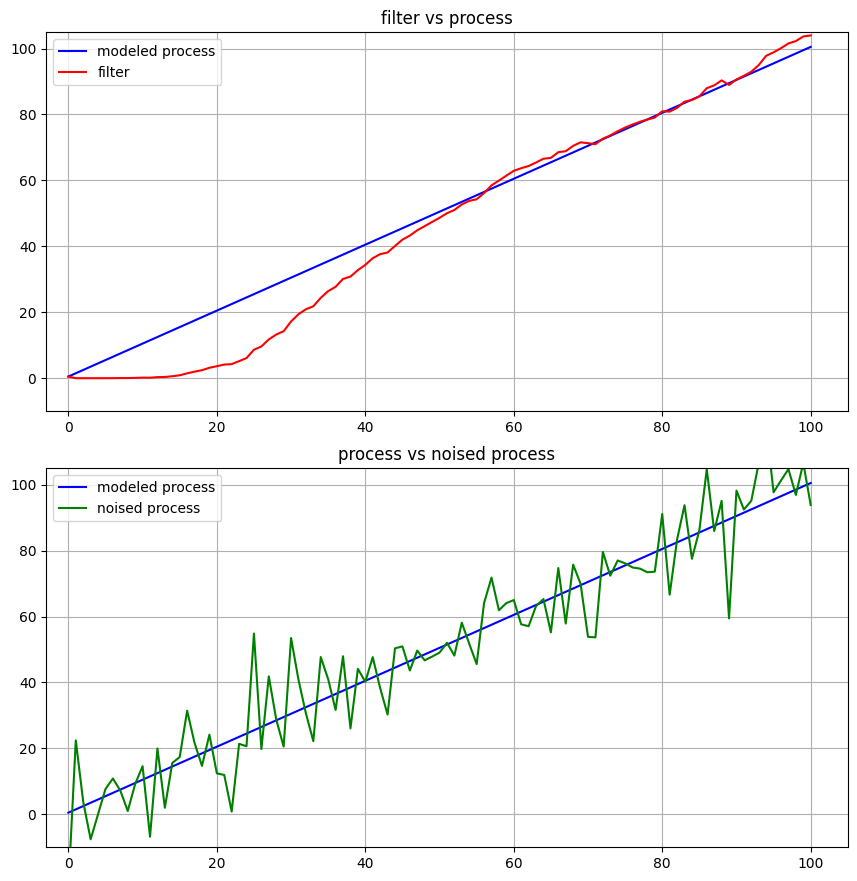

In [172]:
fig, (ax1, ax2) = plt.subplots(2)

fig.set_size_inches(9, 9)
fig.tight_layout(pad=2)

ax1.plot(t, process.data, c='b', label='modeled process', ms=3)
#ax1.errorbar(t, filter, yerr=3, c='r', label='filter', fmt= '.',ecolor = 'lightgreen', elinewidth = 1, capsize=5, ms=3)
ax1.plot(t, filter, c='r', label='filter', ms=3)
ax1.set_title("filter vs process")
ax1.set_xlim(-3, size+5)
ax1.set_ylim(-10, size+5)
ax1.grid()
ax1.legend()


ax2.plot(t, process.data, c='b', label='modeled process', ms=3)
ax2.plot(t, process.noised_data, c='g', label='noised process', ms=3)
#ax2.errorbar(t, process.noised_data, yerr=3, c='g', label='filter', fmt= '.',ecolor = 'lightgreen', elinewidth = 1, capsize=5, ms=3)
ax2.set_title("process vs noised process")
ax2.set_xlim(-3, size+5)
ax2.set_ylim(-10, size+5)
ax2.grid()
ax2.legend()
plt.savefig("res.png")

plt.show()

In [173]:
size = 100

process = Process(init_0=100, dx=-dx, process_var=90)
filter = []
filter.append(x0)

t = np.linspace(0, size, size + 1)
for i in t[1:]:
    mes = process.get_mes()
    estimate, cov = kf(np.array([[mes]]))
    filter.append(estimate[0][0])

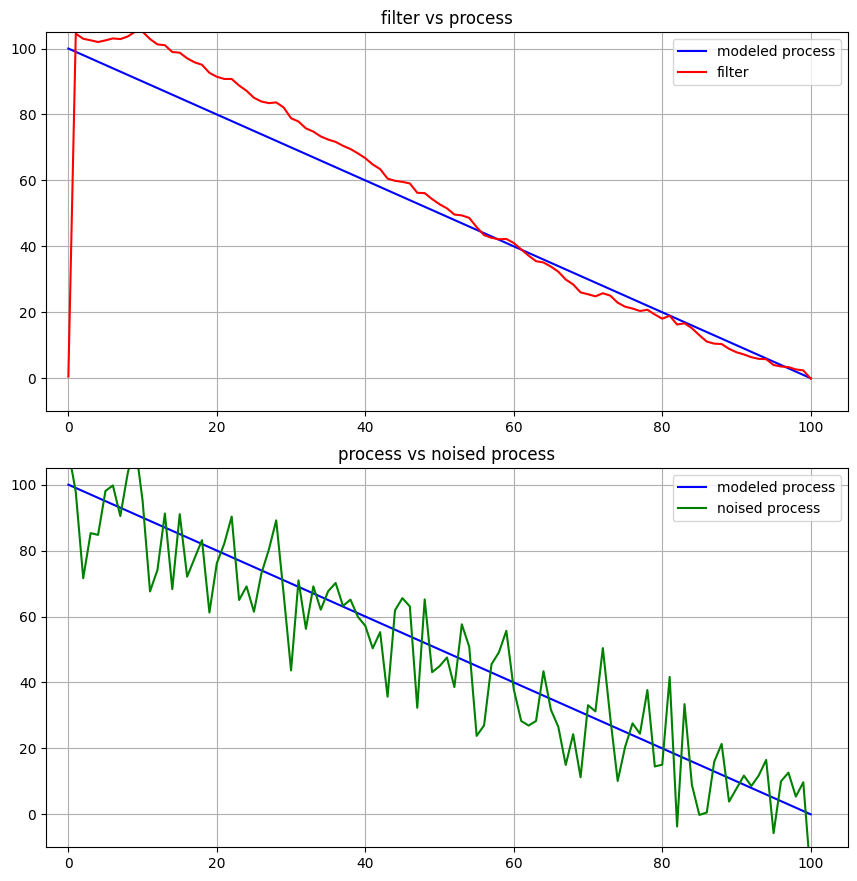

In [174]:
fig, (ax1, ax2) = plt.subplots(2)

fig.set_size_inches(9, 9)
fig.tight_layout(pad=2)

ax1.plot(t, process.data, c='b', label='modeled process', ms=3)
#ax1.errorbar(t, filter, yerr=3, c='r', label='filter', fmt= '.',ecolor = 'lightgreen', elinewidth = 1, capsize=5, ms=3)
ax1.plot(t, filter, c='r', label='filter', ms=3)
ax1.set_title("filter vs process")
ax1.set_xlim(-3, size+5)
ax1.set_ylim(-10, size+5)
ax1.grid()
ax1.legend()


ax2.plot(t, process.data, c='b', label='modeled process', ms=3)
ax2.plot(t, process.noised_data, c='g', label='noised process', ms=3)
#ax2.errorbar(t, process.noised_data, yerr=3, c='g', label='filter', fmt= '.',ecolor = 'lightgreen', elinewidth = 1, capsize=5, ms=3)
ax2.set_title("process vs noised process")
ax2.set_xlim(-3, size+5)
ax2.set_ylim(-10, size+5)
ax2.grid()
ax2.legend()
plt.savefig("res.png")

plt.show()

In [157]:
filter = np.array([filter])
mean_sq_filter = ((filter - process.data)**2).mean()
mean_sq_noise = ((process.noised_data - process.data)**2).mean()


print("filter_error: " + str(mean_sq_filter) + " pure_error: " + str(mean_sq_noise))

filter_error: 14.004754196805457 pure_error: 93.84571588793847
